## BẢNG PHÂN CÔNG
| MSSV     | Họ và tên        | % đóng góp (tối đa 100%) | Chi   tiết công việc         |
|----------|------------------|--------------------------|------------------------------|
| 19120511 | Võ Văn Hiếu      | 100                      | câu 1,2                      |
| 19120526 | Huỳnh Đức Huy    | 100                      | câu 1,2 + tiền xử lý dữ liệu |
| 19120539 | Vương Thế Khang  | 100                      | câu 5,6                      |
| 19120554 | Lê Kiệt          | 100                      | câu 3,4                      |
| 19120586 | Nguyễn Phát Minh | 100                      | Tiền xử lý dữ liệu           |

# THƯ VIỆN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# PHÂN TÍCH DỮ LIỆU


## I. TIỀN XỬ LÝ DỮ LIỆU
### 1. Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [2]:
df_playlist = pd.read_csv("data/playlist.csv")
df_track    = pd.read_csv("data/track.csv")
df_user     = pd.read_csv("data/user.csv")

df_playlist.shape, df_track.shape, df_user.shape

((6777, 6), (40004, 10), (22161, 7))

### 2. Các file dữ liệu có các dòng nào bị trùng lắp hoàn toàn không?
- Thấy rằng từ output, không có dòng nào bị trùng lắp hoàn toàn trong từng file dữ liệu

In [3]:
df_playlist.duplicated().sum(), df_track.duplicated().sum(), df_user.duplicated().sum()

(0, 0, 0)

### 3. Các file có dòng nào bị trùng id (playlist_id, track_id, user_id) không?
- Vì dữ liệu là dữ liệu thời gian thực nên nên việc kiểm tra có dòng trùng nhau hoàn toàn hay không vẫn chưa đủ vì giả sử 2 playlist giống nhau nhưng giây trước có `likes_count` = 100, giây sau có thể `likes_count` = 101 và hiển nhiên đây sẽ là 2 dòng khác nhau do có thuộc tính `likes_count` khác nhau tuy chúng là 1 playlist. Vì vậy cần kiểm tra có tồn tại trùng id trong 3 file này hay không

In [4]:
print('Số dòng trùng playlist_id trong playlist.csv:', df_playlist['playlist_id'].duplicated().sum())
print('Số dòng trùng track_id trong track.csv:', df_track['track_id'].duplicated().sum())
print('Số dòng trùng user_id trong user.csv:', df_user['user_id'].duplicated().sum())

Số dòng trùng playlist_id trong playlist.csv: 0
Số dòng trùng track_id trong track.csv: 0
Số dòng trùng user_id trong user.csv: 0


### 4. Mỗi cột thuộc kiểu dữ liệu nào? Có cột nào bị thiếu dữ liệu không?
- Với mỗi file, kết hợp 2 công việc này vào 1 dataframe. Dataframe này gồm các cột chính là các cột thuộc tính trong lần lượt 3 file và 2 hàng có tên: 
    - `type` - thể hiện kiểu dữ liệu của các thuộc tính trong file
    - `missing percentage` - mỗi cột thiếu bao nhiêu phần trăm dữ liệu  

#### File `playlist.csv`:  Ta sẽ xem thử ứng với ý nghĩa mỗi cột trong file `playlist.csv` thì kiểu dữ liệu thể hiện đã phù hợp hay chưa, mỗi cột có bao nhiêu phần trăm giá trị thiếu. Biết các cột mang ý nghĩa sau (trích từ Project_01 của nhóm):

| Thuộc tính      | Mô tả                                                                                       |
| ---             | ---                                                                                         |
| `playlist_id`   | ID của playlist, mỗi playlist có một ID riêng biệt, dùng để phân biệt với các playlsit khác |
| `playlist_name` | Tựa đề của playlist                                                                         |
| `genre`         | Thể loại của playlist                                                                       |
| `likes_count`   | Số lượt thích của playlist                                                                  |
| `reposts_count` | Số lượt chia sẻ của playlist                                                                |
| `track_ids`     | ID của các track thuộc playlist, ngăn cách nhau mởi dấu ','                                 |


In [5]:
pd.DataFrame([df_playlist.dtypes, (df_playlist.isna().sum()/df_playlist.shape[0]*100).round(2)], index= ['type', 'missing percentage'])

,playlist_id,playlist_name,genre,likes_count,reposts_count,track_ids
type,int64,object,object,int64,int64,object
missing percentage,0.0,0.0,82.22,0.0,0.0,0.97


- **Nhận xét**: 
    - Có 0.97% playlist thiếu các track -> bỏ các playlist này
    - Có 82.22% playlist chưa có thể loại `genre` -> điền khuyết dựa vào cột `playlist_name` (được trình bày rõ hơn ở các cell sau)
    - Các cột đã thể hiện đúng kiểu dữ liệu

#### File `track.csv`: Ta sẽ xem thử ứng với ý nghĩa mỗi cột trong file `track.csv` thì kiểu dữ liệu thể hiện đã phù hợp hay chưa, mỗi cột có bao nhiêu phần trăm giá trị thiếu. Biết các cột mang ý nghĩa sau (trích từ Project_01 của nhóm):

| Thuộc tính       | Mô tả                                                                              |
| ---              | ---                                                                                |
| `track_id`       | ID của track, mỗi track có một ID riêng biệt, dùng để phân biệt với các track khác |
| `track_name`     | Tên track                                                                          |
| `track_genre`    | Thể loại của track                                                                 |
| `author_id`      | ID user của người đăng tải track                                                   |
| `likes_count`    | Số lượt thích của track                                                            |
| `playback_count` | Số lượt nghe lại của track                                                         |
| `download_count` | Số lượt tải của track                                                              |
| `reposts_count`  | Số lượt chia sẻ của track                                                          |
| `comment_count`  | Số bình luận của track                                                             |
| `created_date`   | Chuỗi lưu ngày giờ track được đăng theo định dạng "yyy-mm-ddTHH:MM:SSZ"            |

In [6]:
pd.DataFrame([df_track.dtypes, (df_track.isna().sum()/df_track.shape[0]*100).round(2)], index= ['type', 'missing percentage'])

,track_id,track_name,track_genre,author_id,likes_count,playback_count,download_count,reposts_count,comment_count,created_date
type,int64,object,object,int64,float64,float64,float64,int64,float64,object
missing percentage,0.0,0.0,14.67,0.0,1.05,1.05,1.05,0.0,1.26,0.0


- **Nhận xét**:
    - Có 14.67% track thiếu thể loại `genre` -> giữ nguyên và biến đổi thành list trống; 85.33% track có `genre` còn lại sẽ được điều chỉnh để khớp thể loại với file keywords.txt (trình bày rõ hơn ở các cell sau)
    - `likes_count`, `playback_count`, `download_count`, `comment_count` thiếu hơn 1% dữ liệu -> bỏ các track bị thiếu 1 trong các thuộc tính này
    - `likes_count`, `playback_count`, `download_count`, `comment_count` có kiểu dữ liệu chưa phù hợp -> đổi sang dạng int
    - `created_date` có kiểu dữ liệu chưa phù hợp -> đổi sang dạng datetime

#### File `user.csv`: Ta sẽ xem thử ứng với ý nghĩa mỗi cột trong file `user.csv` thì kiểu dữ liệu thể hiện đã phù hợp hay chưa, mỗi cột có bao nhiêu phần trăm giá trị thiếu. Biết các cột mang ý nghĩa sau (trích từ Project_01 của nhóm):

| Thuộc tính        | Mô tả                                                                           |
| ---               | ---                                                                             |
| `user_id`         | ID của user, mỗi user có một ID riêng biệt, dùng để phân biệt với các user khác |
| `full_name`       | Tên đầy đủ của user                                                             |
| `username`        | Tên hiển thị usernam                                                            |
| `followers_count` | Số người theo dõi của user                                                      |
| `track_count`     | Số track đã đăng tải của user                                                   |
| `country_code`    | Mã Alpha-2 chuẩn ISO 3166-1 của quốc gia của user                               |
| `verified`        | `True` nếu user đã xác thực, `False` user chưa xác thực                         |

In [7]:
pd.DataFrame([df_user.dtypes, (df_user.isna().sum()/df_user.shape[0]*100).round(2)], index= ['type', 'missing percentage'])

,user_id,full_name,username,followers_count,track_count,country_code,verified
type,int64,object,object,int64,int64,object,bool
missing percentage,0.0,38.55,0.0,0.0,0.0,41.69,0.0


- **Nhận xét**: 
    - Tuy có tồn tại dữ liệu thiếu ở 2 cột `full_name` và `country_code` nhưng sẽ không bỏ các dữ liệu thiếu này mà sẽ giữ nguyên để đảm bảo có đủ dữ liệu phục vụ cho câu hỏi sau này
    - Các cột đã có kiểu dữ liệu phù hợp

### 5. Xử lý dòng bị thiếu dữ liệu 

#### a) Loại dòng thiếu dữ liệu

-  File `playlist.csv`: Như đã nói từ các cell trước, cần loại đi các playlist không có track nào (tức thuộc tính `track_ids` bị thiếu). 

In [8]:
df_playlist = df_playlist.dropna(subset=['track_ids'])
df_playlist.shape

(6711, 6)

- File `track.csv`: Như đã nói từ các cell trước, cần loại đi các dòng thiếu thuộc tính `likes_count`, `playback_count`, `download_count`, `comment_count` vì đây là các thuộc tính numeric quan trọng cho bước khám phá dữ liệu sau này

In [9]:
df_track = df_track.dropna(subset= ['likes_count', 'playback_count', 'download_count', 'comment_count'])
df_track.shape

(39498, 10)

#### b) Điền khuyết giá trị thiếu

- Trong file `playlist.csv`, có 3 vấn đề liên quan tới cột `genre`: 
    - <font color='red'>_Vấn đề 1_</font>: cột `genre` bị thiếu khá nhiều nên ta không loại các dòng thiếu `genre` được vì sẽ không đủ dữ liệu để phân tích sau này 
    <br>=> Giải pháp: nội suy từ cột `playlist_name`. Từ quan sát file, thấy rằng hầu hết tên playlist có xu hướng thể hiện luôn thể loại của playlist đó. VD: `playlist_name` = *"Hip Hop Supreme"* thì có thể nội suy được thể loại là **hiphop**

    - <font color='red'>_Vấn đề 2_</font>: 1 playlist có thể có nhiều thể loại (dù thiếu hay không thiếu thuộc tính `genre`) 
        - VD 1 (thiếu thuộc tính `genre`): nếu`playlist_name` = *"| Chill | Lofi | Hip Hop |"* thì playlist đó có tới 3 thể loại: **[chill, lofi, hiphop]**. 
        - VD 2 (không thiếu thiếu thuộc tính `genre`): `genre` = *"LoFi hip hop"* thì playlist đó có tới 2 thể loại là **[lofi, hiphop]**.     
<br>=> Giải pháp: thuộc tính `genre` của mỗi playlist sẽ là list các string thể hiện cho các thể loại thay vì chỉ là 1 string thể hiện cho 1 thể loại</br>
    
    - <font color='red'>_Vấn đề 3_</font>: giả sử giải quyết được 2 vấn đề trên thì thấy rằng tên thể loại vẫn chưa đồng nhất (VD: `genre` = *"Blue's_Music"* và `genre` = *"blues"*)
    <br>=> Giải pháp: cần 1 file `keywords.txt` để lưu cứng tên của các thể loại nhạc sẽ xuất hiện trong chuỗi string `genre` (file này được lấy từ project 1 và được tinh chỉnh lại để phù hợp). Ta sẽ chuẩn hóa thể loại dựa vào file này: xét chuỗi thể loại (VD: `genre` = *"Hip-hop & Rap"*), nếu chuỗi thể loại này chứa bất kỳ chuỗi con trong `keywords.txt` (VD: *"hiphop"* và *"rap"*) thì thể loại sẽ được thay bằng (tập) chuỗi con ấy (VD: `genre` sau khi chuẩn hóa = *["hiphop", "rap"]*)
- Kết hợp cả 3 giải pháp trên, ta được cách xử lý sau: 
    - Bước 1: Cộng 2 cột 'playlist_name' & 'genre', nếu 'genre' là NaN thì coi như chuỗi rỗng, kết quả cộng chuỗi lưu vào `df_playlist['genre']`
    - Bước 2: Chuẩn hóa `name_genre` theo giải pháp 3, kết quả sau khi chuẩn hóa là 1 list, lưu lại vào `name_genre`. Sau khi chuẩn hóa có thể vẫn tồn tại NaN nhưng ít hơn (NaN tồn tại là vì cột `playlist_name` không chứa thể loại nhạc nào nên không nội suy được + cột `genre` bị rỗng). Các giá trị NaN sẽ được chuyển thành list rỗng

##### Đọc dữ liệu từ file `keywords.txt` vào mảng keywords.txt

In [10]:
with open('data/keywords.txt', encoding= 'utf-8') as f:
    keywords = f.readlines()
keywords = [item.strip('\n').strip(' ') for item in keywords]

##### Bước 1: Cộng 2 cột 'playlist_name' & 'genre', nếu 'genre' là NaN thì coi như chuỗi rỗng, kết quả cộng chuỗi lưu vào `df_playlist['genre']`

In [11]:
# namegenre = playlist_name + playlist_genre
name_genre = df_playlist.apply(lambda row: row['playlist_name'] if pd.isna(row['genre']) 
                                                                else row['playlist_name'] + row['genre'], axis = 1)

##### Bước 2: Chuẩn hóa `name_genre` theo giải pháp 3, kết quả sau khi chuẩn hóa là 1 list, lưu lại vào `name_genre`. Sau khi chuẩn hóa có thể vẫn tồn tại NaN nhưng ít hơn (NaN tồn tại là vì cột `playlist_name` không chứa thể loại nhạc nào nên không nội suy được + cột `genre` bị rỗng). Các giá trị NaN sẽ được chuyển thành list rỗng

In [12]:
def list_genres(genre_str, keywords=keywords):
    res = []

    for keyword in keywords:
        if keyword in genre_str:
            res.append(keyword)
    return res

df_playlist['genre'] = name_genre.apply(lambda val: [] if pd.isna(val) else list_genres(re.sub(r'[\-\.\/ ]', '', val.lower())))
df_playlist

,playlist_id,playlist_name,genre,likes_count,reposts_count,track_ids
0,730118454,Best Rap Right Now: Drippin',"[hiphop, rap]",389440,21590,"1175290570,1163320396,1150594213,1126802848,11..."
1,380154338,Hip Hop Supreme,[hiphop],178872,9795,"594112890,596212962,593601912,597082389,597563..."
2,306226961,Lowfi hip hop chills,"[hiphop, chill, lofi]",203955,20706,"216774635,406234053,755194606,266707458,670884..."
3,730129140,Hip-Hop Party Starters: Turn Up,"[hiphop, rap]",106087,4498,"1174777750,1118019910,1052667649,1099546222,11..."
4,595582668,Study & Chill | Lofi Hiphop,"[hiphop, chill, lofi]",95519,5951,"483466125,434763492,473421939,194708585,754271..."
...,...,...,...,...,...,...
6772,874102157,Southeast Asia,[asia],0,0,"645192084,301217399,445266303,497328030,243885..."
6773,163153799,og,[],2,0,"201641570,203067189,202303312,153309224,127237..."
6774,161954207,Understanding Southeast Asia,[asia],1,1,"236643473,235582652,231384822,248514720"
6775,6217649,King,[],0,0,"84607913,83434103,81824297,85106607,81948650,8..."


- Trong file `track.csv`, ta làm tương tự các bước như xử lý `genre` của `playlist.csv`, chỉ khác ở bước 1 ta không cộng với `track_name` vì `track_name` không nội suy được thể loại của track như `playlist_name`  

In [13]:
df_track['track_genre'] = df_track['track_genre'].apply(lambda val: [] if pd.isna(val) 
                                                                    else list_genres(re.sub(r'[\-\.\/ ]', '', val.lower())))
df_track.head()

,track_id,track_name,track_genre,author_id,likes_count,playback_count,download_count,reposts_count,comment_count,created_date
0,1157194048,Polo G - Bad Man (Smooth Criminal),[hiphop],454955073,104933.0,3656798.0,0.0,1484,2949.0,2021-11-10T00:16:07Z
1,1134572425,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",[hiphop],811818505,229321.0,11713134.0,0.0,2994,7358.0,2021-10-01T21:15:32Z
2,1126802848,Rocc Climbing (feat. Lil Yachty),"[hiphop, rap]",277094000,191418.0,8635832.0,0.0,9338,3428.0,2021-09-18T08:16:48Z
3,1163320396,By Your Side,[rap],29550459,84417.0,2861345.0,0.0,952,1064.0,2021-11-19T21:15:58Z
4,1150594213,Super Gremlin,"[hiphop, rap]",72181005,180822.0,6808317.0,0.0,1826,2265.0,2021-10-30T03:48:49Z


### 6. Chuyển đổi kiểu dữ liệu cho phù hợp


- File `track.csv`: 
    - Cần đổi kiểu dữ liệu của 2 cột `likes_count`, `playback_count`từ **float** sang **int**
    - Cần đổi kiểu dữ liệu của `created_date` sang kiểu **datetime**

In [14]:
df_track[['likes_count', 'playback_count', 'download_count', 'reposts_count', 'comment_count']] = df_track[['likes_count', 'playback_count', 'download_count', 'reposts_count', 'comment_count']].astype(int)
df_track['created_date'] = pd.to_datetime(df_track['created_date'])

# II. KHÁM PHÁ DỮ LIỆU

## 1. Thể loại phổ biến/được yêu thích/được nghe nhiều/được tương tác nhiều nhất trong năm 2020

- **Mục đích:** Trả lời được câu hỏi này giúp ta biết được xu hướng âm nhạc trong năm gần đây nhất, tức năm 2020.
- **Bộ dữ liệu**: track.csv
- **Các bước thực hiện:**
    - Xác định các tracks được đăng vào năm 2020 (kết quả lưu vào `df_track_2020`)
    - Thống kê phần trăm số track, like, playback và comment của từng thể loại (kết quả lưu vào `df_track_genre_stat`)
    - Tỉ lệ số track của một thể loại là tỉ lệ so với tổng số track tìm được và ứng với **độ phổ biến** của thể loại đó
    - Tỉ lệ số like của một thể loại là tỉ lệ so với tổng số like của các track tìm được và ứng với **độ yêu thích** của thể loại đó
    - Tỉ lệ số lượt playback của một thể loại là tỉ lệ so với tổng số lượt playback của các track tìm được và ứng với **số lượt nghe** của thể loại đó
    - Tỉ lệ số comment của một thể loại là tỉ lệ so với tổng số comment của các track tìm được ứng với **độ tương tác** của người dùng với các track thuộc thể loại đó
    - Vẽ biểu đồ cột và nhận xét

### Bước 1: Xác định các track được đăng vào năm 2020

In [15]:
df_track_2020 = df_track.loc[df_track['created_date'].dt.year == 2020]

total_tracks_count   = len(df_track_2020)
total_likes_count    = df_track_2020['likes_count'].sum()
total_playback_count = df_track_2020['playback_count'].sum()
total_comment_count  = df_track_2020['comment_count'].sum()

df_track_2020.head()

,track_id,track_name,track_genre,author_id,likes_count,playback_count,download_count,reposts_count,comment_count,created_date
32,755194606,take your time w/ Gavin Stacey,[chill],173815195,352,60196,0,19,9,2020-02-05 00:15:08+00:00
39,869432971,my block,"[hiphop, lofi]",173815195,180,19939,0,3,6,2020-08-03 15:19:31+00:00
43,755431168,brava,[],1821566,719,46597,1,93,42,2020-02-05 12:58:07+00:00
61,754271845,there's a storm outside my window (Available o...,[],238168640,2667,588029,0,58,89,2020-02-03 11:15:32+00:00
109,870653725,Rags to Riches 2 (feat. Lil Baby),"[hiphop, rap]",29550459,274332,18337445,0,4478,14865,2020-08-05 15:54:16+00:00


### Bước 2: Thống kê phần trăm số track, like, playback và comment của từng thể loại

In [16]:
tracks_count       = df_track_2020['track_genre'].explode().value_counts()
tracks_percentage  = tracks_count.apply(lambda x: x * 100.0 / total_tracks_count)
tracks_percentage  = tracks_percentage.radd(pd.Series(dict(zip(keywords, [0 for keyword in keywords]))), fill_value = 0)

likes_count      = df_track_2020.explode('track_genre').groupby(['track_genre'])['likes_count'].sum()
likes_percentage = likes_count.apply(lambda x: x * 100.0 / total_likes_count)
likes_percentage = likes_percentage.radd(pd.Series(dict(zip(keywords, [0 for keyword in keywords]))), fill_value = 0)

playback_count = df_track_2020.explode('track_genre').groupby(['track_genre'])['playback_count'].sum()
playback_percentage = playback_count.apply(lambda x: x * 100.0 / total_playback_count)
playback_percentage = playback_percentage.radd(pd.Series(dict(zip(keywords, [0 for keyword in keywords]))), fill_value = 0)

comment_count  = df_track_2020.explode('track_genre').groupby(['track_genre'])['comment_count'].sum()
comment_percentage = comment_count.apply(lambda x: x * 100.0 / total_comment_count)
comment_percentage = comment_percentage.radd(pd.Series(dict(zip(keywords, [0 for keyword in keywords]))), fill_value = 0)

df_track_genre_stat = pd.DataFrame([pd.Series({'tracks_percentage':tracks_percentage[genre], 'likes_percentage':likes_percentage[genre], 'playback_percentage':playback_percentage[genre], 'comment_percentage':comment_percentage[genre]}) for genre in keywords], index = keywords)
df_track_genre_stat.head()

,tracks_percentage,likes_percentage,playback_percentage,comment_percentage
hiphop,12.692967,54.330660,67.734359,77.760914
chill,0.257290,0.018596,0.026602,0.013091
anime,0.085763,0.003248,0.003957,0.002661
blue,0.771870,0.007077,0.010558,0.004896
children,0.257290,0.000045,0.000037,0.000532


### Bước 3: Vẽ biểu đồ và nhận xét

<BarContainer object of 15 artists>

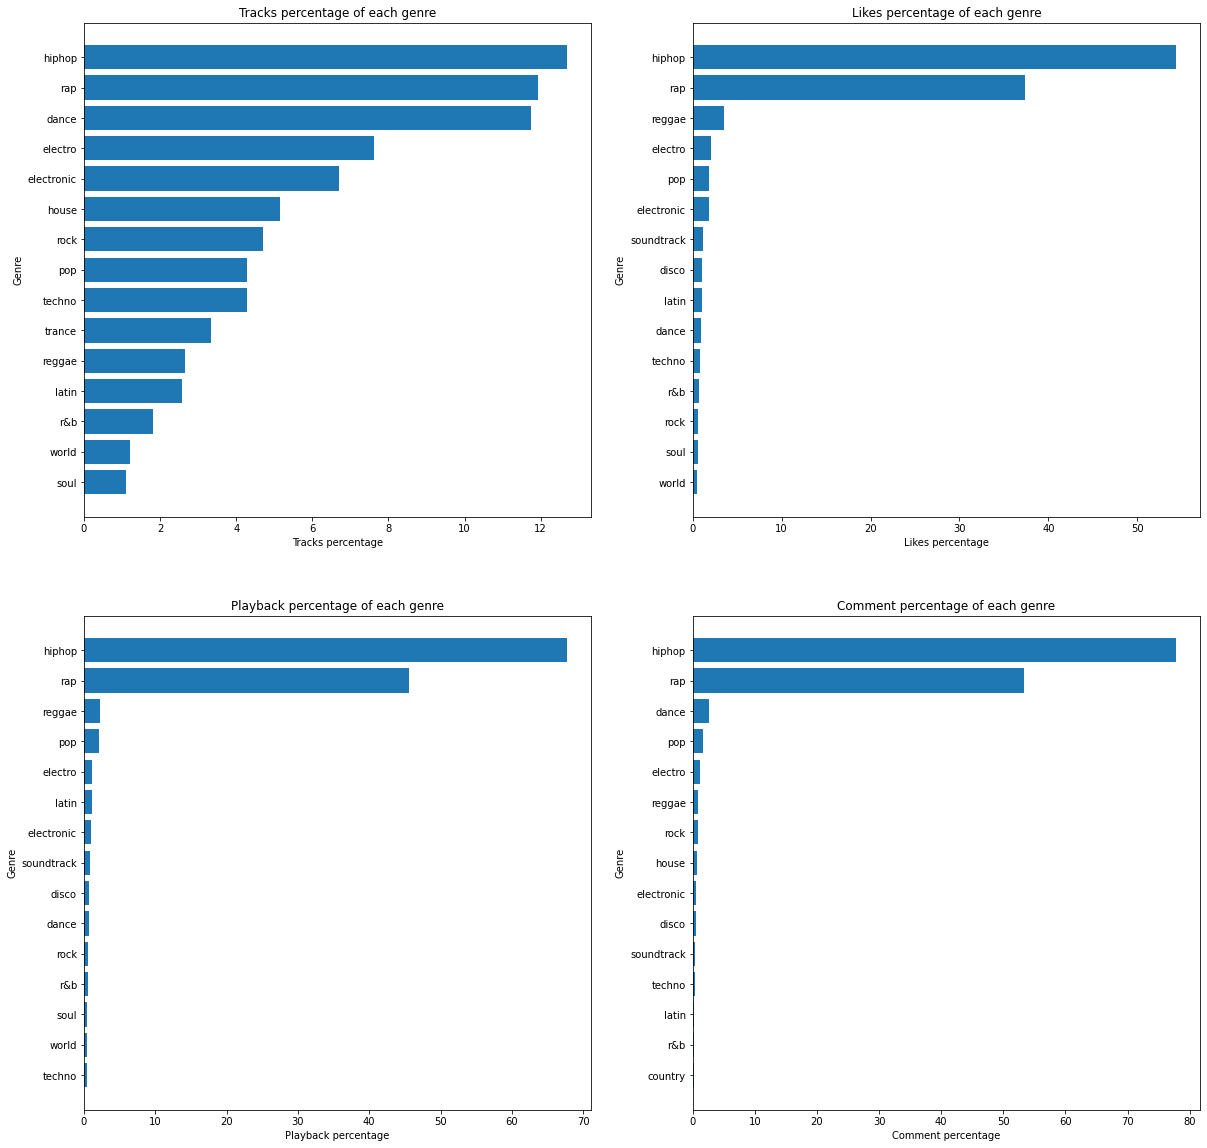

In [43]:
fig, axs = plt.subplots(2, 2, figsize = (20, 20))

df_track_genre_stat = df_track_genre_stat.sort_values('tracks_percentage', ascending = False)
axs[0, 0].set_title('Tracks percentage of each genre')
axs[0, 0].set(xlabel = 'Tracks percentage', ylabel = 'Genre')
axs[0, 0].invert_yaxis()
axs[0, 0].barh(df_track_genre_stat.index[:15], df_track_genre_stat['tracks_percentage'][:15])


df_track_genre_stat = df_track_genre_stat.sort_values('likes_percentage', ascending = False)
axs[0, 1].set_title('Likes percentage of each genre')
axs[0, 1].set(xlabel = 'Likes percentage', ylabel = 'Genre')
axs[0, 1].invert_yaxis()
axs[0, 1].barh(df_track_genre_stat.index[:15], df_track_genre_stat['likes_percentage'][:15])

df_track_genre_stat = df_track_genre_stat.sort_values('playback_percentage', ascending = False)
axs[1, 0].set_title('Playback percentage of each genre')
axs[1, 0].set(xlabel = 'Playback percentage', ylabel = 'Genre')
axs[1, 0].invert_yaxis()
axs[1, 0].barh(df_track_genre_stat.index[:15], df_track_genre_stat['playback_percentage'][:15])

df_track_genre_stat = df_track_genre_stat.sort_values('comment_percentage', ascending = False)
axs[1, 1].set_title('Comment percentage of each genre')
axs[1, 1].set(xlabel = 'Comment percentage', ylabel = 'Genre')
axs[1, 1].invert_yaxis()
axs[1, 1].barh(df_track_genre_stat.index[:15], df_track_genre_stat['comment_percentage'][:15])

**Kết quả (từ trái qua phải, từ trên xuống dưới):** 

Top 3 thể loại nhạc phổ biến năm 2020: 
1. Hiphop
2. Rap
3. Dance
 
Top 3 thể loại nhạc được yêu thích nhiều nhất năm 2020: 
1. Hiphop
2. Rap
3. Reggae

Top 3 thể loại nhạc được nghe nhiều nhất năm 2020
1. Hiphop
2. Rap
3. Reggae

Top 3 thể loại nhạc có nhiều tương tác nhất năm 2020
1. Hiphop
2. Rap
3. Dance

**Kết luận:** Nhạc hiphop là thể loại nhạc được ưa chuộng nhiều nhất vào năm 2020.

## 2. Thể loại phổ biến nhất tại khu vực châu Âu

- **Mục đích:** Trả lời được câu hỏi này giúp ta biết được xu hướng âm nhạc tại châu Âu trong các năm qua.
- **Bộ dữ liệu**: track.csv và user.csv
- **Các bước thực hiện:**
- Xác định các track từ châu Âu (kết quả lưu vào `df_track_europe`)
- Thống kê phần trăm số track thuộc mỗi thể loại so với tổng số track tìm được, tỉ lệ này ứng với độ phổ biến của mỗi thể loại (kết quả lưu vào `tracks_percentage`)
- Vẽ biểu đồ cột và nhận xét

**Tiền xử lý thêm:** Thêm thuộc tính `country_code` vào từng track của `df_track` (`country_code` được lấy từ tác giả tương ứng của track) 

In [18]:
def country_code(track):
    user = df_user[df_user['user_id'] == track['author_id']]
    if len(user) == 0:
        return np.nan
    return user.iloc[0]['country_code']

df_track['country_code'] = df_track.apply(country_code, axis = 1)
df_track.head()

,track_id,track_name,track_genre,author_id,likes_count,playback_count,download_count,reposts_count,comment_count,created_date,country_code
0,1157194048,Polo G - Bad Man (Smooth Criminal),[hiphop],454955073,104933,3656798,0,1484,2949,2021-11-10 00:16:07+00:00,US
1,1134572425,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",[hiphop],811818505,229321,11713134,0,2994,7358,2021-10-01 21:15:32+00:00,US
2,1126802848,Rocc Climbing (feat. Lil Yachty),"[hiphop, rap]",277094000,191418,8635832,0,9338,3428,2021-09-18 08:16:48+00:00,US
3,1163320396,By Your Side,[rap],29550459,84417,2861345,0,952,1064,2021-11-19 21:15:58+00:00,NaN
4,1150594213,Super Gremlin,"[hiphop, rap]",72181005,180822,6808317,0,1826,2265,2021-10-30 03:48:49+00:00,NaN


### Bước 1: Xác định các track từ châu Âu

Danh sách mã Alpha-2 các nước châu Âu: https://abbreviations.yourdictionary.com/articles/list-of-europe-country-codes.html

In [19]:
europe_country_codes = [
    # EU
    'AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 
    'DE', 'GR', 'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL',
    'PL', 'RO', 'SK', 'SI', 'ES', 'SE', 
    
    # Non-EU
    'AL', 'AD', 'AM', 'BY', 'BA', 'FO', 'GE', 'GI', 'IS', 'IM',
    'XK', 'LI', 'MK', 'MD', 'MC', 'ME', 'NO', 'RU', 'SM', 'RS',
    'CH', 'TR', 'UA', 'GB', 'VA'
]

df_track_europe = df_track[df_track['country_code'].isin(europe_country_codes)]
df_track_europe.head()

,track_id,track_name,track_genre,author_id,likes_count,playback_count,download_count,reposts_count,comment_count,created_date,country_code
35,636296325,Paths,[jazz],47192613,422,80472,0,12,9,2019-06-13 21:59:16+00:00,NO
36,593821473,Flowering,[lofi],47192613,451,78548,0,9,4,2019-03-21 23:02:34+00:00,NO
38,593822025,Adolescence,[lofi],47192613,223,63022,0,3,1,2019-03-21 23:03:34+00:00,NO
59,473421939,last light,[lofi],232053386,10655,1455669,1000,277,219,2018-07-18 16:42:43+00:00,FR
66,453244743,What's Your Name,"[chill, lofi]",308816878,5776,1137473,0,135,106,2018-06-03 19:35:50+00:00,GB


### Bước 2: Tính phần trăm số track thuộc mỗi thể loại

In [20]:
total_tracks_count = len(df_track_europe)
tracks_count = df_track_europe['track_genre'].explode().value_counts()
tracks_percentage = tracks_count.apply(lambda x: x * 100.0 / total_tracks_count)
tracks_percentage = tracks_percentage.radd(pd.Series(dict(zip(keywords, [0 for keyword in keywords]))), fill_value = 0)

### Bước 3: Vẽ biểu đồ và nhận xét

<BarContainer object of 50 artists>

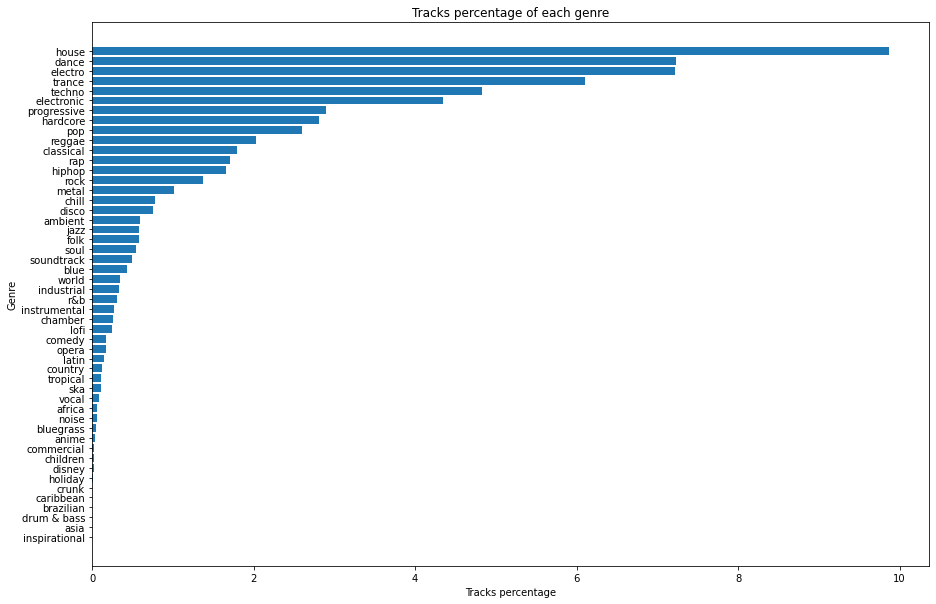

In [21]:
plt.figure(figsize = (15, 10))

plt.title("Tracks percentage of each genre")
plt.ylabel("Genre")
plt.xlabel("Tracks percentage")
tracks_percentage = tracks_percentage.sort_values(ascending = True)
plt.barh(tracks_percentage.index, tracks_percentage)

**Kết quả:** 

Top 3 thể loại phổ biến nhất châu Âu:
1. House
2. Dance
3. Electro

**Kết luận:** Thể loại House là thể loại nhạc phổ biến nhất châu Âu.

## 3. Xét 1 playlist, có mối tương quan nào giữa số lượt thích và số lượt chia sẻ ? 

- **Mục đích**: Nếu số lượt thích (`likes_count`) và số lượt chia sẻ (`reposts_count`) tương quan dương, mạnh (cùng tăng - đó là điều ta mong muốn) thì <u>1 trong số các khả năng</u> gây ra mối tương quan dương, mạnh này đó là: nhiều likes đồng nghĩa với nhiều lượt chia sẻ, như vậy playlist đó sẽ được quảng bá tới nhiều người hơn trên SoundCloud 
- **Bộ dữ liệu**: playlist.csv
- **Các bước thực hiện**:
    - Vẽ biểu đồ scatter trực quan hóa mối quan hệ giữa số lượt thích và số lượt chia sẻ
    - Tính toán ma trận tương quan (correlation matrix)

### Bước 1: Vẽ biểu đồ scatter trực quan hóa mối quan hệ giữa số lượt thích và số lượt chia sẻ

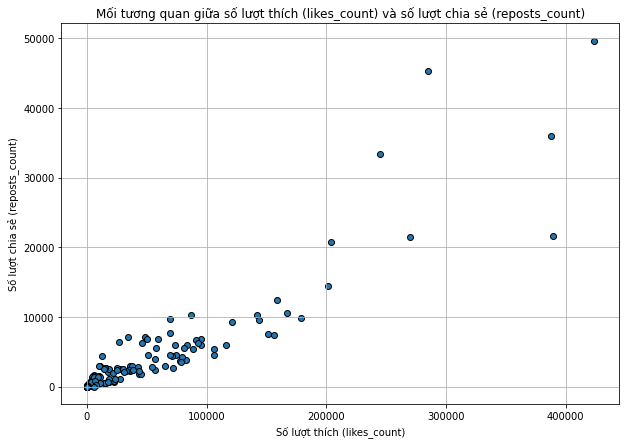

In [22]:
plt.figure(figsize=(10,7))
plt.grid()
plt.scatter(df_playlist['likes_count'], df_playlist['reposts_count'], edgecolors='black')
plt.xlabel('Số lượt thích (likes_count)') 
plt.ylabel('Số lượt chia sẻ (reposts_count)');
plt.title('Mối tương quan giữa số lượt thích (likes_count) và số lượt chia sẻ (reposts_count)');
# plt.axvline(np.mean(df_playlist['likes_count']), color='r', linestyle='--') # lượt like TB

**Nhận xét**: Từ quan sát đồ thị tương quan phía dưới, thấy rằng mối quan hệ giữa `số lượt thích` (biến ngẫu nhiên A) và `số lượt chia sẻ` (biến ngẫu nhiên B) gần như là 1 đường tuyến tính. A và B tỷ lệ thuận, tuy nhiên mối quan hệ chỉ thực sự mạnh khi A và B dưới 200.000, còn A và B bắt đầu trên 200.000 thì các điểm dữ liệu thưa thớt dần chứng tỏ mối tương quan càng yếu dần, nghĩa là A và B ngày càng không liên quan tới nhau khi 1 trong 2 biến đạt ít nhất 200.000. Hoặc đơn giản là từ 200.000 trở đi xuất hiện các outliers

### Bước 2: Lập ma trận tương quan
- Để thể hiện sự tương quan giữa A và B bằng 1 con số, ta dùng ma trận tương quan `Pearson correlation matrix`, thấy rằng độ tương quan là ~0.934 tức tương quan dương khá mạnh.

In [23]:
likes_reposts = df_playlist[['likes_count', 'reposts_count']]
likes_reposts.corr(method = 'pearson')

,likes_count,reposts_count
likes_count,1.000000,0.934027
reposts_count,0.934027,1.000000


## 4. Có tồn tại mối quan hệ nào giữa số lượng track mà 1 người dùng xác thực (verified user) đăng lên SoundCloud và số lượng người theo dõi của user ấy? 

- **Người dùng xác thực (verified user)**: Theo SoundCloud (https://help.soundcloud.com/hc/en-us/articles/360058973693-Profile-verification-) thì người dùng xác thực có thể được coi như một nghệ sỹ nổi tiếng trên nền tảng. Đó là lý do ta sẽ làm việc với duy nhất các verified user, còn những người dùng không thuộc nhóm verified user thì không được xét tới
- **Mục đích**: Nếu có tồn tại mối tương quan dương, mạnh giữa số track (`tracks_count`) và số lượng người theo dõi (`followers_count`) của 1 người nổi tiếng (`verified user`) trên SoundCloud thì <u>1 trong các khả năng</u> gây ra mối tương quan dương, mạnh này là nhiều track sẽ đồng nghĩa với nhiều người theo dõi
- **Bộ dữ liệu**: user.csv

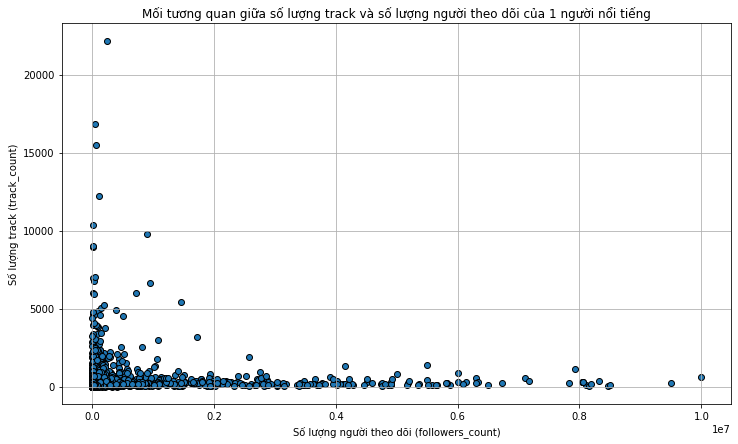

In [26]:
verified_users = df_user[df_user['verified'] == True]
verified_users

plt.figure(figsize=(12,7))
plt.grid()
plt.scatter(verified_users['followers_count'], verified_users['track_count'], edgecolors='black')
plt.xlabel('Số lượng người theo dõi (followers_count)')
plt.ylabel('Số lượng track (track_count)')
plt.title('Mối tương quan giữa số lượng track và số lượng người theo dõi của 1 người nổi tiếng');

**Nhận xét**: Từ biểu đồ, dễ thấy không có mối liên quan, hoặc liên quan rất ít giữa số người theo dõi và số track đăng tải của nghệ sỹ. Ma trận tương quan Pearson ở dưới cũng thể hiện điều đó (độ tương quan ~0.02)

In [45]:
verified_users[['followers_count', 'track_count']].corr(method='pearson')

,followers_count,track_count
followers_count,1.0000,0.0217
track_count,0.0217,1.0000


## 5. Mối tương quan giữa likes_count, playback_count, download_count, reposts_count, comment_count

**Mục đích**: Các cách thể hiện sự yêu thích của user đối với 1 track có quan hệ với nhau hay không. Các cách thể hiện sự yêu thích bao gồm: qua lượt thích (`likes_count`), lượt nghe (`playback_count`), lượt tải (`download_count`), lượt chia sẻ (`reposts_count`), lượt bình luận (`comment_count`).

**Bộ dữ liệu:** track.csv

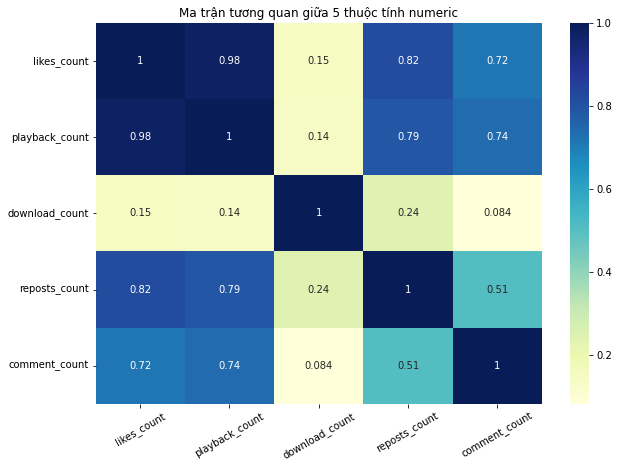

In [28]:
df = df_track[['likes_count','playback_count','download_count','reposts_count','comment_count']]
corr = df.corr(method='pearson')
plt.figure(figsize=(10,7))

g = sns.heatmap(corr, annot=True, cmap="YlGnBu")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title('Ma trận tương quan giữa 5 thuộc tính numeric');

**Nhận xét:** Từ ma trận tương quan, dễ thấy ngay biến `download_counts` có tương quan dương rất yếu với các biến còn lại. Xét 4 biến còn lại, thấy rằng chúng đều có tương quan lẫn nhau và tương quan khá mạnh. Tuy nhiên để biết con số trên có thực sự thể hiện mối quan hệ "mạnh" như ta nghĩ hay không, ta cần phải vẽ đồ thị cho chúng.

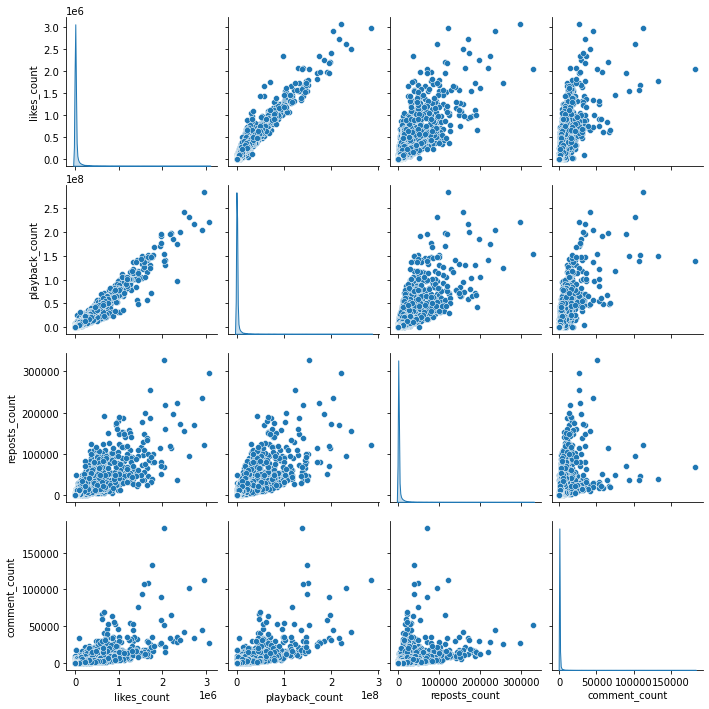

In [29]:
df = df_track[['likes_count', 'playback_count', 'reposts_count', 'comment_count']]
g = sns.pairplot(df, diag_kind="kde") # corner=True to plot only the lower triangle
# g.fig.set_size_inches(15,15)

**Nhận xét:** Chỉ có tương quan giữa `playback_count` & `likes_count` là tương quan dương và gần như là 1 đường thẳng chứng tỏ quan hệ mạnh. Còn các mối tương quan còn lại, ví dụ như cặp `repost_count` và `likes_count` (và các cặp có kiểu hình scatter tương tự) thì tương quan phân tán khá nhiều nên không thể coi là tương quan mạnh, hay cặp `likes_count` và `comment_count` thì tương đổi mạnh khi 1 trong 2 biến này nằm trong khoảng [0, 1e6], còn ngoài khoảng đó thì bắt đầu phân tán và tương quan yếu dần.

## 6. Mùa nào trong 4 mùa là mùa có nhiều bài hát được sáng tác và đăng tải nhất?

- **Mục đích**: nắm rõ thời điểm đăng tải nhạc của những nghệ sỹ nổi tiếng. Đặt trường hợp ta làm cho 1 công ty giải trí thì việc hỏi câu hỏi này giúp ta định hướng nghệ sỹ của công ty đăng các bản track vào mùa không trùng với mùa của nghệ sỹ nổi tiếng để tăng lượng người nghe lên nhiều nhất có thể
- **Bộ dữ liệu**: track.csv và user.csv

### Bước 1: tìm năm có nhiều track của các nghệ sỹ nhất để đảm bảo số lượng dữ liệu đủ nhiều để phục vụ câu hỏi

In [30]:
verified_users = df_user[df_user['verified'] == True]
track_of_artists = df_track.loc[df_track['author_id'].isin(verified_users['user_id'])]
track_of_artists.groupby(track_of_artists['created_date'].dt.year).agg(n_tracks = ('track_id','count')).sort_values(by='n_tracks', ascending=False)

,n_tracks
created_date,
2016,2951
2014,2692
2015,2591
2013,1968
2017,1362
2018,962
2012,920
2019,861
2011,519


Từ kết quả, chọn năm 2016

In [31]:
track_of_artists = track_of_artists.loc[track_of_artists['created_date'].dt.year == 2016]

### Bước 2: tạo thêm cột `season` ở mỗi dòng để thể hiện track đó được đăng tải vào mùa nào. Mùa nào ứng với tháng mấy có thể coi ở đây: https://www.vntrip.vn/cam-nang/cac-mua-trong-nam-xuan-ha-thu-dong-tu-thang-may-den-thang-may-106063

In [32]:
def is_season(date):
    if date.month in [3,4,5]: return 'spring'
    if date.month in [6,7,8]: return 'summer'
    if date.month in [9,10,11]: return 'fall'
    if date.month in [12,1,2]: return 'winter'
track_of_artists['season'] = track_of_artists.apply(lambda row: is_season(row['created_date']), axis=1)

### Bước 3: Trực quan hóa số lượng track/mùa

Text(0.5, 1.0, 'Số lượng track/mùa')

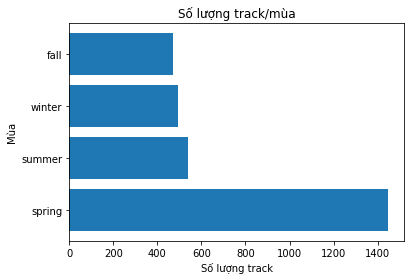

In [33]:
# plt.figure(figsize=(8,6))
tmp = track_of_artists['season'].value_counts()
plt.barh(tmp.index, tmp)
plt.xlabel('Số lượng track')
plt.ylabel('Mùa')
plt.title('Số lượng track/mùa')

**Nhận xét**: Dễ thấy rằng từ biểu đồ, nghệ sỹ của công ty nên đăng tải các bản track vào mùa thu hoặc đông vì đây là mùa có ít lượt đăng tải track nhất năm và tránh đăng tải vào mùa xuân vì mức độ cạnh tranh với các nghệ sỹ nổi tiếng khá cao

## III. KẾT LUẬN

Việc thống kê và trả lời các hỏi ở bước khám phá dữ liệu không thể hiện được tất cả, tuy nhiên vẫn đủ thể hiện được một phần nào đó những thắc mắc về những vấn đề cần quan tâm. Rào cản ở đồ án này là việc thu thập dữ liệu chưa đủ lớn, dữ liệu còn cần phải có nhiều thuộc tính hơn, không lấy hết nhưng có thể lấy tổng quát đầy đủ các track, các playlist và các user.

Ngoài ra còn có một hạn chế trong quá trình khám phá dữ liệu nằm ở việc phân loại thể loại âm nhạc (`genre`) chưa thực sự thuyết phục, dữ liệu vẫn được phân loại theo quy chuẩn của tụi em, chưa thể phân loại rõ ràng chi tiết từng track và từng playlist, tuy nhiên thời gian không đủ để xử lý thu thập dữ liệu lớn (sẽ mất rất nhiều thời gian và giới hạn vẫn nằm ở việc học tập nghiên cứu) cũng như giới hạn kiến thức nên tạm thời dừng lại ở đây.

Nếu còn nhiều thời gian cho đồ án, cao hơn là ứng dụng của đồ án cho thực tế thì nhóm tụi em hy vọng sẽ làm được nhiều thứ hơn, cho ra các kết quả phản ánh tốt hơn mong đợi. Tuy nhiên cũng nhìn nhận những vấn đề được xử lý theo dữ liệu sẵn vẫn khả thi để chúng ta có thể rút ra một kết luận cụ thể nào đó. 